In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [191]:
#load csv file
df = pd.read_csv(r'train.csv')
test_df = pd.read_csv(r'test.csv')

In [192]:
#print first 5 rows in DataFrame
df.head()

,label,text,EmailID
0,Ham,eric called me last night and i am happy to co...,0
1,Spam,tr what is funnygadget com funnygadget com ca...,1
2,Ham,"ricky sent me the nom early - 87 , 000 for the...",2
3,Ham,these are the numbers that are being exported ...,3
4,Spam,authentic replica rolex and other watches for ...,4


In [193]:
df.tail()

,label,text,EmailID
46519,Ham,thanks mo original message white stacey w sent...,46519
46520,Spam,"hello , welcome to the medzo flagstaff nline\n...",46520
46521,Spam,here are different kinds of drugs for hair l o...,46521
46522,Spam,dear customer do you shop for medications on t...,46522
46523,Spam,"yap international , inc . ( ypil )\nvoip techn...",46523


In [194]:
#Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [195]:
df.isna().sum()

label      0
text       0
EmailID    0
dtype: int64

In [196]:
test_df = test_df.fillna(test_df["EmailID"].mean())
df = df.fillna(df["EmailID"].mean())


In [197]:
test_df

,text,EmailID
0,monika try calling ron heller escapenumber esc...,46524
1,"dear all ,\nattached is a paper describing the...",46525
2,arm inc e yo xual des spe ume reas ur se ire r...,46526
3,you are the man http ourmix hk,46527
4,kay mann enron com bmm b b b b b b b escapenum...,46528
...,...,...
11626,start date : 1 / 10 / 02 ; hourahead hour : 10...,58150
11627,customer service rep please contact customer p...,58151
11628,legal operating systems for a quarter of the p...,58152
11629,plan conference call escapenumberpm sunday dis...,58153


In [198]:
df.describe(include='object')

,label,text
count,46524,46524
unique,2,46524
top,Ham,eric called me last night and i am happy to co...
freq,24532,1


In [199]:
test_df.describe(include='object')

,text
count,11631
unique,11631
top,monika try calling ron heller escapenumber esc...
freq,1


In [200]:
labelencoder = LabelEncoder()
df['label_enc']=labelencoder.fit_transform(df['label'])

In [201]:
df.head()

,label,text,EmailID,label_enc
0,Ham,eric called me last night and i am happy to co...,0,0
1,Spam,tr what is funnygadget com funnygadget com ca...,1,1
2,Ham,"ricky sent me the nom early - 87 , 000 for the...",2,0
3,Ham,these are the numbers that are being exported ...,3,0
4,Spam,authentic replica rolex and other watches for ...,4,1


In [202]:
test_df

,text,EmailID
0,monika try calling ron heller escapenumber esc...,46524
1,"dear all ,\nattached is a paper describing the...",46525
2,arm inc e yo xual des spe ume reas ur se ire r...,46526
3,you are the man http ourmix hk,46527
4,kay mann enron com bmm b b b b b b b escapenum...,46528
...,...,...
11626,start date : 1 / 10 / 02 ; hourahead hour : 10...,58150
11627,customer service rep please contact customer p...,58151
11628,legal operating systems for a quarter of the p...,58152
11629,plan conference call escapenumberpm sunday dis...,58153


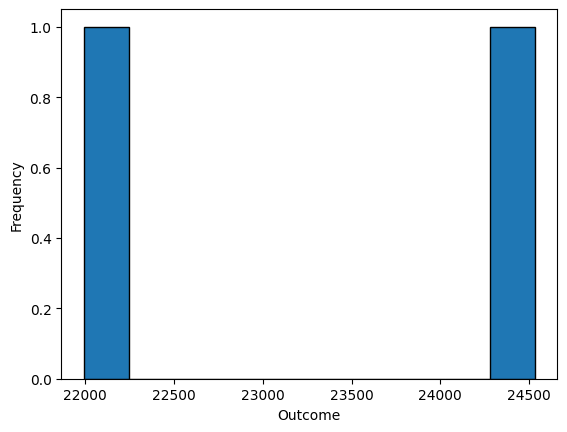

In [203]:
plt.hist(df['label'].value_counts(),edgecolor = "black")
plt.ylabel('Frequency')
plt.xlabel('Outcome')
plt.show()

In [204]:
x= df['text' ]
y=df['label_enc']

In [205]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [207]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000,strip_accents='unicode', token_pattern=r'[a-zA-Z0-9]+',analyzer='word',lowercase=True, )
xtrain = vectorizer.fit_transform(xtrain)
xtest = vectorizer.transform(xtest)
#xtest_tfid = vectorizer.transform(xtest)


In [208]:
nb=MultinomialNB()
nb.fit(xtrain, ytrain)
ypred = nb.predict(xtest)

In [209]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      4930
           1       0.97      0.94      0.95      4375

    accuracy                           0.95      9305
   macro avg       0.96      0.95      0.95      9305
weighted avg       0.96      0.95      0.95      9305



In [210]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [211]:
ypred = model.predict(xtest)
cnf_matrix = metrics.confusion_matrix(ytest, ypred)
print(cnf_matrix)
print(classification_report(ytest, ypred))

[[4789  141]
 [ 140 4235]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4930
           1       0.97      0.97      0.97      4375

    accuracy                           0.97      9305
   macro avg       0.97      0.97      0.97      9305
weighted avg       0.97      0.97      0.97      9305



In [212]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=5, random_state=42, criterion="gini", splitter='best')
model2.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [213]:
ypred = model2.predict(xtest)
cnf_matrix = metrics.confusion_matrix(ytest, ypred)
print(cnf_matrix)
print(classification_report(ytest, ypred))

[[3464 1466]
 [ 284 4091]]
              precision    recall  f1-score   support

           0       0.92      0.70      0.80      4930
           1       0.74      0.94      0.82      4375

    accuracy                           0.81      9305
   macro avg       0.83      0.82      0.81      9305
weighted avg       0.84      0.81      0.81      9305



In [171]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_jobs=-1, n_estimators=100, random_state=42)
model3.fit(xtrain, ytrain)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [172]:
ypred = model3.predict(xtest)
cnf_matrix = metrics.confusion_matrix(ytest, ypred)
print(cnf_matrix)
print(classification_report(ytest, ypred))

[[4819  111]
 [ 146 4229]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4930
           1       0.97      0.97      0.97      4375

    accuracy                           0.97      9305
   macro avg       0.97      0.97      0.97      9305
weighted avg       0.97      0.97      0.97      9305



In [173]:
# from sklearn.neural_network import MLPClassifier
# mlp_model = MLPClassifier(hidden_layer_sizes=(100), batch_size= 46, learning_rate= 'constant', activation = 'relu', alpha= 0.041,learning_rate_init=0.0041)
# mlp_model.fit (xtrain, ytrain)
# preds2 = mlp_model.predict(xtest)
# #a = [print(i) for i in preds]
# print(classification_report(ytest, preds2))
# cnf_matrix2 = metrics.confusion_matrix(ytest, preds2)
# print(cnf_matrix2)

In [174]:
x_test_tfid = vectorizer.transform(test_df['text'])

In [175]:
ytest2=model3.predict(x_test_tfid)

In [176]:
test_df.tail()

,text,EmailID
11626,start date : 1 / 10 / 02 ; hourahead hour : 10...,58150
11627,customer service rep please contact customer p...,58151
11628,legal operating systems for a quarter of the p...,58152
11629,plan conference call escapenumberpm sunday dis...,58153
11630,original message thomas padron enron sent mond...,58154


In [177]:
test_df = test_df.fillna(test_df["EmailID"].mean())

In [178]:
ytest2

array([1, 0, 1, ..., 1, 0, 0])

In [179]:
len(ytest2)

11631

In [180]:
df_submission = pd.DataFrame({'EmailID': test_df['EmailID'], 'label':ytest2 })

In [181]:
df_submission.columns

Index(['EmailID', 'label'], dtype='object')

In [182]:
df


,label,text,EmailID,label_enc
0,Ham,eric called me last night and i am happy to co...,0,0
1,Spam,tr what is funnygadget com funnygadget com ca...,1,1
2,Ham,"ricky sent me the nom early - 87 , 000 for the...",2,0
3,Ham,these are the numbers that are being exported ...,3,0
4,Spam,authentic replica rolex and other watches for ...,4,1
...,...,...,...,...
46519,Ham,thanks mo original message white stacey w sent...,46519,0
46520,Spam,"hello , welcome to the medzo flagstaff nline\n...",46520,1
46521,Spam,here are different kinds of drugs for hair l o...,46521,1
46522,Spam,dear customer do you shop for medications on t...,46522,1


In [183]:
df_submission

,EmailID,label
0,46524,1
1,46525,0
2,46526,1
3,46527,1
4,46528,1
...,...,...
11626,58150,0
11627,58151,0
11628,58152,1
11629,58153,0


In [184]:
df_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11631 entries, 0 to 11630
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   EmailID  11631 non-null  int64
 1   label    11631 non-null  int64
dtypes: int64(2)
memory usage: 181.9 KB


In [185]:
df_submission['label'] = df_submission['label'].apply(lambda x: "Spam" if x == 1 else "Ham")

In [186]:
df_submission.isna().sum()

EmailID    0
label      0
dtype: int64

In [187]:
df_submission

,EmailID,label
0,46524,Spam
1,46525,Ham
2,46526,Spam
3,46527,Spam
4,46528,Spam
...,...,...
11626,58150,Ham
11627,58151,Ham
11628,58152,Spam
11629,58153,Ham


In [188]:
df_submission['label'].value_counts()

label
Ham     6118
Spam    5513
Name: count, dtype: int64

In [189]:
df_submission.to_csv('620141104_submission5.csv', index=False)